<a href="https://colab.research.google.com/github/mazdakdev/AI-Bootcamp/blob/main/Movie_Review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

## Downloading Required DataSets

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!wget https://raw.githubusercontent.com/mazdakdev/AI-Bootcamp/main/movie_review.csv

--2023-03-30 07:10:28--  https://raw.githubusercontent.com/mazdakdev/AI-Bootcamp/main/movie_review.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9150992 (8.7M) [text/plain]
Saving to: ‘movie_review.csv’

movie_review.csv    100%[===================>]   8.73M  --.-KB/s    in 0.06s   

2023-03-30 07:10:28 (139 MB/s) - ‘movie_review.csv’ saved [9150992/9150992]



## Reading The Data

In [4]:
df = pd.read_csv('movie_review.csv')
df.shape

(64720, 6)

In [5]:
df.dropna(inplace = True)
cdf = df[["text", "tag"]]
cdf.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


## Preprocessing The Texts

1.   Removing the stop words
2.   Removing morphological affixes from words, leaving only the word stem.
3.   Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.


In [6]:
def preprocess_text(text):
  text = text.lower()
  text = ''.join([word for word in text.split() if word not in stopwords.words('english')])
  ps = PorterStemmer()
  text = ''.join([ps.stem(word) for word in text.split()])
  lemmatizer = WordNetLemmatizer()
  text = ''.join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

##Passing the texts as an parameter to the function
> This may take a while

In [7]:
cdf['text'] = cdf['text'].apply(preprocess_text)

<ipython-input-7-7031b464fdf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['text'] = cdf['text'].apply(preprocess_text)


##Vectorizing the Texts

We need to transform our text data into numerical values. this process is often called vectorization or feature extraction. it vectorizes text data by representing each document as a vector of word counts. Each element in the vector represents the count of a specific word in the vocabulary.




In [8]:
cv = CountVectorizer()
X = cv.fit_transform(cdf['text'])

## Transforming the Vectorized Data into frequency-inverse document frequency (tf-idf)
The tf-idf representation is a way of weighting the importance of each word in a document based on its frequency across all documents in the corpus. It is commonly used in natural language processing to reduce the impact of common words that may not carry much meaning in the text data.



In [9]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

y = cdf['tag'].values

## Visualizing Dataset Words
> This may take a while

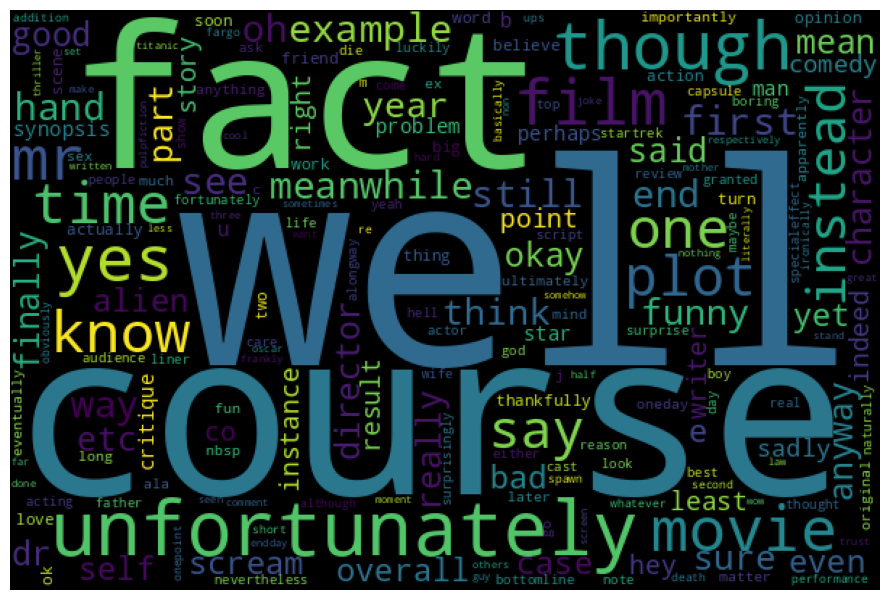

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

_str=''

for string in cdf['text']:
    if(string not in stopwords.words('english')):
        _str=_str+string+' '

polarity_wordcloud = WordCloud(width=600, height=400).generate(_str)
plt.figure(figsize=(9,9))
plt.imshow(polarity_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

## Training the Model 
> This may take a while (5-6 minutes)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

##Evaluating the model with sklearn metrics

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions using the trained SVM model on the test data
y_pred = svm_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.5713071693448702
Precision:  0.5866420882476493
Recall:  0.5680640136539742
F1-score:  0.5454184471063186


##Predicting user-input using our trained model

In [13]:
user_input = input("Enter your text: ")

# Preprocess user input
user_input_processed = tfidf_transformer.transform(cv.transform([user_input]))

# Make prediction using the trained SVM model
prediction = svm_model.predict(user_input_processed)

# Print prediction result
print("Prediction: ", prediction)

Enter your text: the movie sucks
Prediction:  ['neg']
